# Week 01 - Titanic EDA

## Day 0 — Preparation (Task)
**Goal:** Verify Python environment and freeze dependencies.

In [108]:
# Task: Quick environment check and (optional) freeze requirements
import sys

print("Python:", sys.version)

Python: 3.12.11 (main, Sep  9 2025, 12:05:11) [Clang 17.0.0 (clang-1700.0.13.5)]


## Day 1 — Environment & Sanity Check (Task)
**Goal:** Verify that core libraries work and plots render.

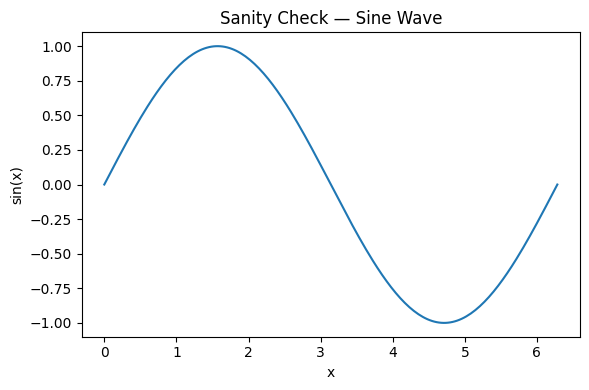

In [109]:
# Task: Import core libraries and draw a simple test plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.title("Sanity Check — Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.tight_layout()
plt.show()

## Day 2 — NumPy Basics (Task)
**Goal:** Create arrays, reshape, slice, broadcast, and compute basic statistics.

In [110]:
# Task: NumPy arrays, slicing, broadcasting, statistics (self-contained)
import numpy as np

# Create arrays
a = np.arange(12)                 # 1D
b = a.reshape(3, 4)               # 2D (3x4)

# Slicing
row0 = b[0, :]                    # first row
col1 = b[:, 1]                    # second column

# Broadcasting
v = np.array([1, 2, 3, 4])        # shape (4,)
b_plus_v = b + v                  # broadcast across rows

# Statistics
stats = {
    "mean": float(b.mean()),
    "std":  float(b.std()),
    "min":  int(b.min()),
    "max":  int(b.max()),
    "shape": b.shape,
}

print("b:\n", b)
print("\nRow 0:", row0)
print("Col 1:", col1)

print("\nv:\n", v)

print("\nBroadcast b + v:\n", b_plus_v)
print("\nStats:", stats)

b:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Row 0: [0 1 2 3]
Col 1: [1 5 9]

v:
 [1 2 3 4]

Broadcast b + v:
 [[ 1  3  5  7]
 [ 5  7  9 11]
 [ 9 11 13 15]]

Stats: {'mean': 5.5, 'std': 3.452052529534663, 'min': 0, 'max': 11, 'shape': (3, 4)}


## Day 3 — pandas Basics (Task 1)
**Goal:** Load the Titanic dataset and inspect it (`head`, `info`, `describe`, missing values`).

In [111]:
# Task: Load Titanic and basic inspection (self-contained)

import pandas as pd

df = pd.read_csv('data/train.csv')
print("Shape:", df.shape)

# head/info/describe
print("\nHead 3 raws:")
display(df.head(3))

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric):")
display(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (891, 12)

Head 3 raws:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Day 3 — pandas Basics (Task 2)
**Goal:** Practice selection and filtering.

In [112]:
# Task: Column/row selection and filtering (self-contained)

import pandas as pd

df = pd.read_csv('data/train.csv')

# Single/multiple columns
age_col = df["Age"] if "Age" in df.columns else df.iloc[:, 0]
age_sex  = df[["Age", "Sex"]] if set(["Age","Sex"]).issubset(df.columns) else df.iloc[:, :2]

# Row filtering examples
older_30 = df[df["Age"] > 30] if "Age" in df.columns else df

print("Age (first 10):\n", age_col.head(10))
print("\nAge + Sex (first 5):\n", age_sex.head())
print("\nRows with Age > 30:", len(older_30))

Age (first 10):
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Age + Sex (first 5):
     Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male

Rows with Age > 30: 305


## Day 4 — Visualization Basics (Task 1)
**Goal:** Plot age distribution (histogram) and save to `plots/`.

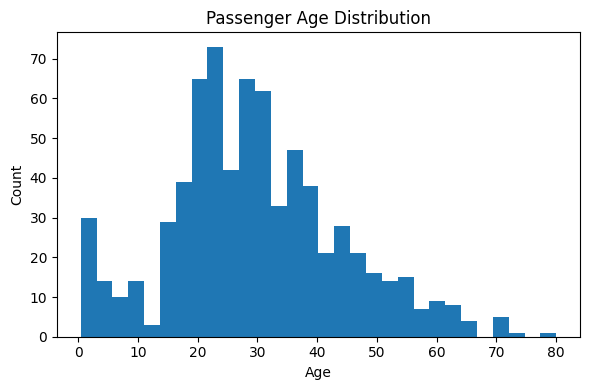

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Task: Histogram of passenger ages (self-contained)
df = pd.read_csv('data/train.csv')
ages = df["Age"].dropna()

plt.figure(figsize=(6,4))
plt.hist(ages, bins=30)
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/age_distribution.png", dpi=300)
plt.show()

## Day 4 — Visualization Basics (Task 2)
**Goal:** Plot survival rate by passenger class (bar chart) and save to `plots/`.

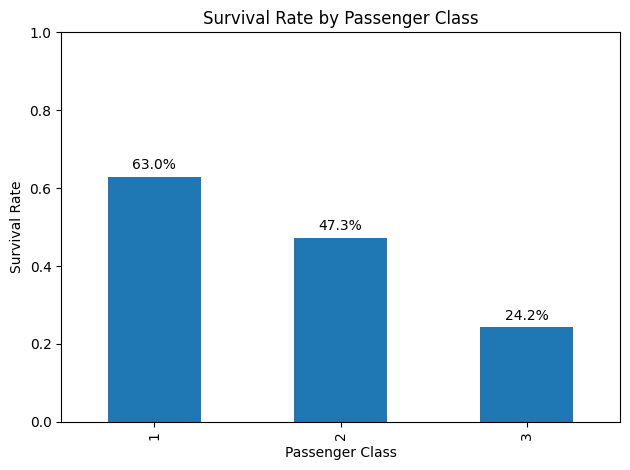

In [114]:
# Task: Survival rate by Pclass (self-contained)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')
rate_by_class = df.groupby("Pclass")["Survived"].mean()

ax = rate_by_class.plot(kind="bar")
ax.set_title("Survival Rate by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, val in enumerate(rate_by_class.values):
    ax.text(i, val + 0.02, f"{val*100:.1f}%", ha="center")

plt.tight_layout()
plt.savefig("plots/survival_by_class.png", dpi=300)
plt.show()

## Day 5 — Titanic EDA (Part 1) (Task 1)
**Goal:** Handle missing values (Age → median, Embarked → mode).

In [115]:
# Task: Fill missing Age (median) and Embarked (mode) (self-contained)

import pandas as pd
df = pd.read_csv('data/train.csv')

# Fill Age
if "Age" in df.columns:
    missing_age_sum = df["Age"].isnull().sum()

    print("Missing Age sum: ", missing_age_sum),

    if df["Age"].isnull().size > 0:
        median_age = df["Age"].median()
        print("Median Age: ", median_age),
        # Fill missing Age (median)
        df["Age"] = df["Age"].fillna(median_age)
        print("Missing Age sum after filling:", df["Age"].isnull().sum())

# Fill Embarked
if "Embarked" in df.columns:
    missing_embarked_sum = df["Embarked"].isnull().sum()
    print('Missing Embarked sum: ', missing_embarked_sum)

    if df["Embarked"].isnull().size > 0:
        mode_emb = df["Embarked"].mode(dropna=True)[0]
        df["Embarked"] = df["Embarked"].fillna(mode_emb)
        print("Missing Embarked after filling:", df["Embarked"].isnull().sum())


Missing Age sum:  177
Median Age:  28.0
Missing Age sum after filling: 0
Missing Embarked sum:  2
Missing Embarked after filling: 0


## Day 5 — Titanic EDA (Part 1) (Task 2)
**Goal:** Survival by Sex and by Pclass (rates + plots).

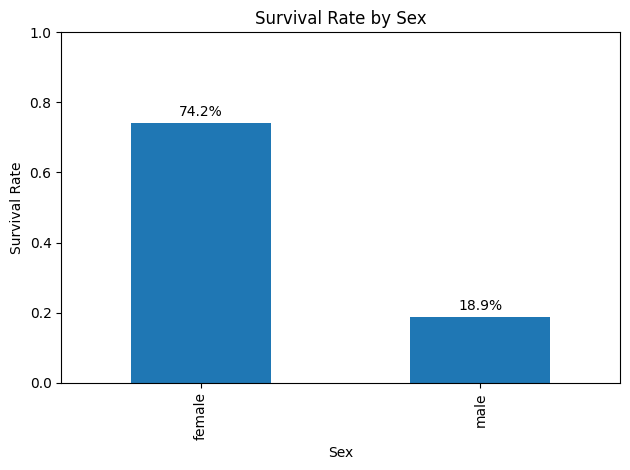

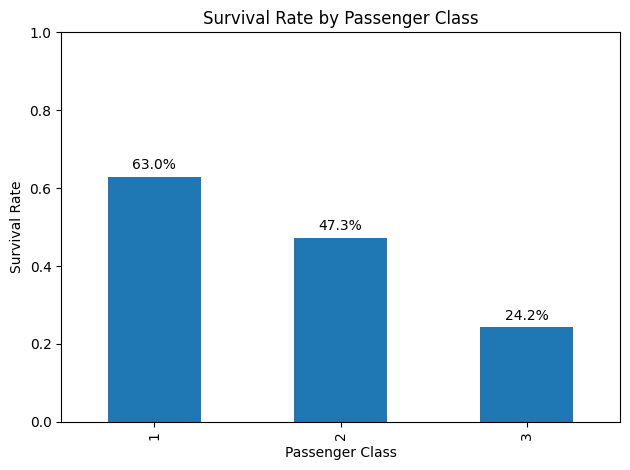

In [116]:
# Task: Survival by Sex and by Pclass (self-contained)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

# Survival rate by Sex
rate_by_sex = df.groupby("Sex")["Survived"].mean()
ax = rate_by_sex.plot(kind="bar")
ax.set_title("Survival Rate by Sex")
ax.set_xlabel("Sex")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, val in enumerate(rate_by_sex.values):
    ax.text(i, val + 0.02, f"{val*100:.1f}%", ha="center")

plt.tight_layout()
plt.show()

# Survival rate by Pclass
rate_by_class = df.groupby("Pclass")["Survived"].mean()
ax = rate_by_class.plot(kind="bar")
ax.set_title("Survival Rate by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, val in enumerate(rate_by_class.values):
    ax.text(i, val + 0.02, f"{val*100:.1f}%", ha="center")

plt.tight_layout()
plt.show()

## Day 5 — Titanic EDA (Part 1) (Task 3)
**Goal:** Survival by Embarked (counts + rate).

Counts per Embarked (including NaN):
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


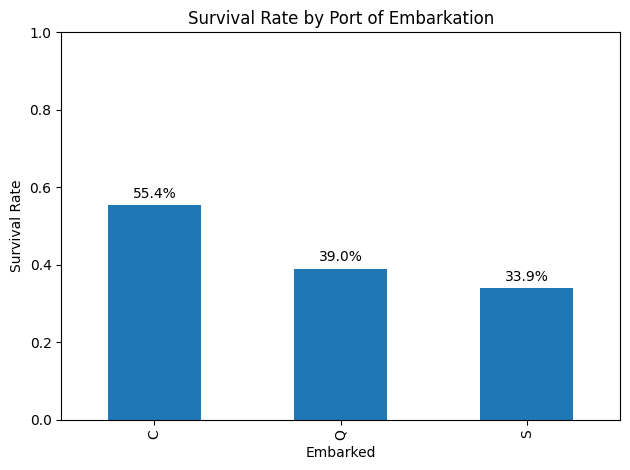

In [117]:
# Task: Embarked counts and survival rates (self-contained)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

# Show counts per port (including NaN if present)
counts = df["Embarked"].value_counts(dropna=False)
print("Counts per Embarked (including NaN):\n", counts)

# Fill missing Embarked with mode for rate calculation
if "Embarked" in df.columns:
    mode_emb = df["Embarked"].mode(dropna=True)[0]
    df["Embarked"] = df["Embarked"].fillna(mode_emb)

rate_by_emb = df.groupby("Embarked")["Survived"].mean()

ax = rate_by_emb.plot(kind="bar")
ax.set_title("Survival Rate by Port of Embarkation")
ax.set_xlabel("Embarked")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, val in enumerate(rate_by_emb.values):
    ax.text(i, val + 0.02, f"{val*100:.1f}%", ha="center")

plt.tight_layout()
plt.show()

## Day 6 — Titanic EDA (Part 2) (Task 1)
**Goal:** Combined features — survival rate by Sex and Pclass (crosstab).

In [118]:
# Task: Crosstab survival rate by Sex and Pclass (self-contained)
import pandas as pd

df = pd.read_csv('data/train.csv')

crosstab_rate = pd.crosstab(
    df["Sex"], df["Pclass"],
    values=df["Survived"],
    aggfunc="mean"
)
print(crosstab_rate)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


## Day 6 — Titanic EDA (Part 2) (Task 2)
**Goal:** Age groups with `pd.cut` and survival by AgeGroup.

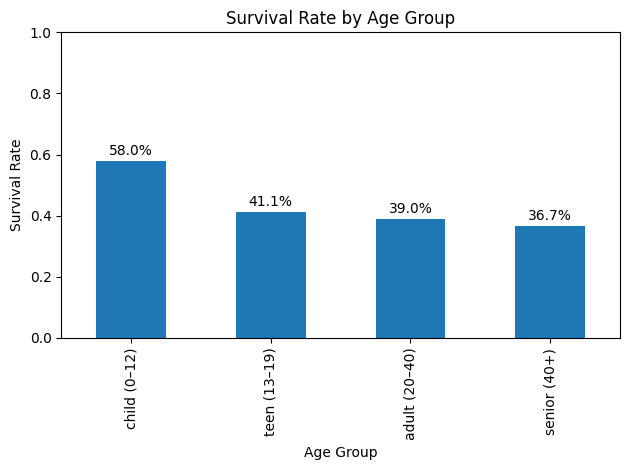

In [119]:
# Task: AgeGroup creation and survival by AgeGroup (self-contained)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

# Define bins and labels
bins   = [0, 12, 19, 40, 100]
labels = ["child (0–12)", "teen (13–19)", "adult (20–40)", "senior (40+)"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

rate_by_agegroup = df.groupby("AgeGroup", observed=True)["Survived"].mean()

ax = rate_by_agegroup.plot(kind="bar")
ax.set_title("Survival Rate by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, val in enumerate(rate_by_agegroup.values):
    ax.text(i, val + 0.02, f"{val*100:.1f}%", ha="center")

plt.tight_layout()
plt.show()

## Day 6 — Titanic EDA (Part 2) (Task 3)
**Goal:** FamilySize feature and Fare distribution by FamilySize (boxplot).

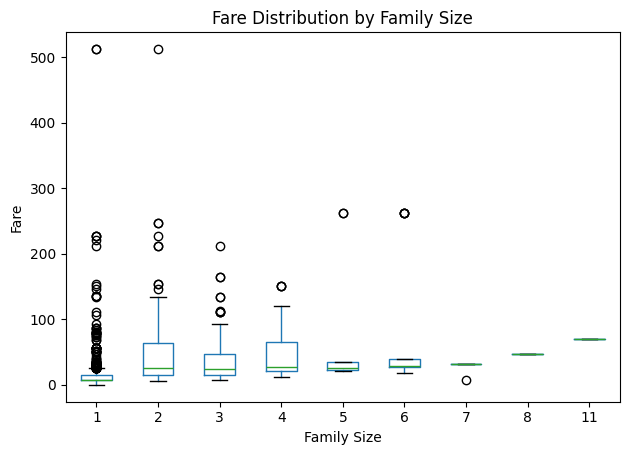

In [120]:
# Task: FamilySize feature and Fare boxplot by FamilySize (self-contained)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

ax = df.boxplot(column="Fare", by="FamilySize", grid=False)
ax.set_title("Fare Distribution by Family Size")
ax.set_xlabel("Family Size")
ax.set_ylabel("Fare")

plt.suptitle("")
plt.tight_layout()
plt.show()

## Day 6 — Titanic EDA (Part 2) (Task 4)
**Goal:** Survival rate by Sex within each AgeGroup (grouped bar plot).

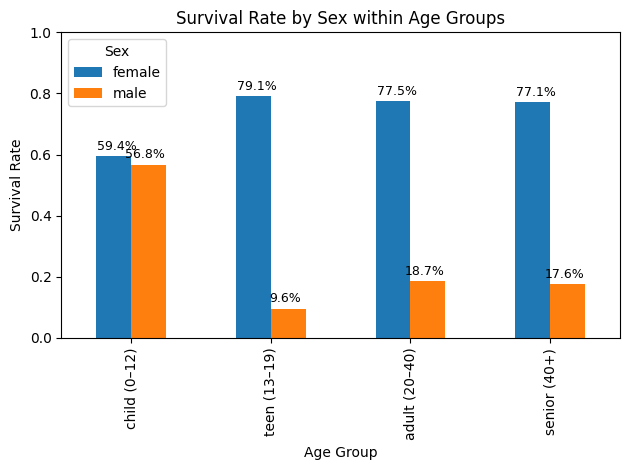

In [121]:
# Task: Survival rate by Sex within AgeGroup (self-contained)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

bins   = [0, 12, 19, 40, 100]
labels = ["child (0–12)", "teen (13–19)", "adult (20–40)", "senior (40+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

table = df.groupby(["AgeGroup", "Sex"], observed=True)["Survived"].mean().unstack()

ax = table.plot(kind="bar", legend=True)
ax.set_title("Survival Rate by Sex within Age Groups")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate")
ax.set_ylim(0, 1)

for i, age_group in enumerate(table.index):
    for j, sex in enumerate(table.columns):
        rate = table.loc[age_group, sex]
        ax.text(i + (j-0.5)*0.2, rate + 0.02, f"{rate*100:.1f}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

## Day 6 — Titanic EDA (Part 2) (Task 5)
**Goal:** Heatmap of survival rate by AgeGroup and Pclass (no seaborn dependency).

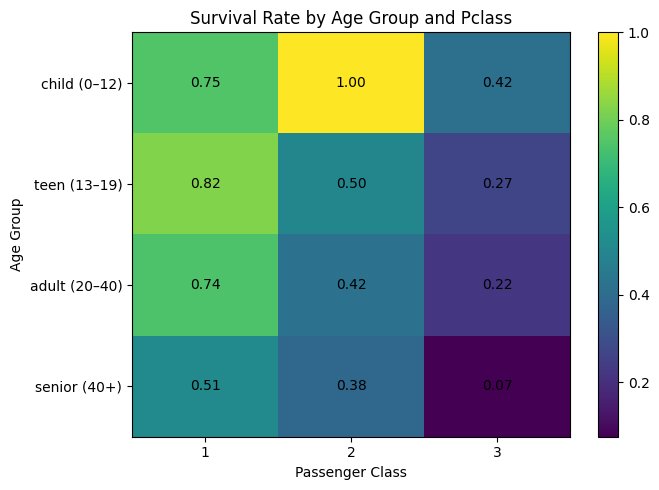

In [122]:
# Task: Heatmap with matplotlib (self-contained, no seaborn requirement)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

# Age groups
bins   = [0, 12, 19, 40, 100]
labels = ["child (0–12)", "teen (13–19)", "adult (20–40)", "senior (40+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

# Crosstab of survival rate
table = pd.crosstab(df["AgeGroup"], df["Pclass"], values=df["Survived"], aggfunc="mean")

data = table.values
fig, ax = plt.subplots(figsize=(7,5))
cax = ax.imshow(data, aspect="auto")

ax.set_xticks(range(len(table.columns)))
ax.set_yticks(range(len(table.index)))
ax.set_xticklabels(list(table.columns))
ax.set_yticklabels(list(table.index))

# annotate cells
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data[i, j]
        if not pd.isnull(val):
            ax.text(j, i, f"{val:.2f}", ha="center", va="center")

fig.colorbar(cax)
ax.set_title("Survival Rate by Age Group and Pclass")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Age Group")
plt.tight_layout()
plt.show()